In [4]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline

In [5]:
# Lendo o arquivo com os dados
df = pd.read_csv('A200611189_28_143_208.csv', encoding='ISO-8859-1')

In [6]:
# Exibe uma descrição das colunas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  328 non-null    object
 1   2019/Nov   328 non-null    object
 2   2019/Dez   328 non-null    object
 3   2020/Jan   328 non-null    object
 4   2020/Fev   328 non-null    object
 5   2020/Mar   328 non-null    object
 6   2020/Abr   328 non-null    object
 7   Total      328 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 20.6+ KB


In [7]:
# Remove a última linha, não necessária
df.drop(df.tail(1).index, inplace=True)

In [8]:
# exibe uma amostra dos dados
df.sample(5)

,Município,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,Total
148,352440 Jacareí,1019,1026,970,958,1005,829,5807
73,351210 Colômbia,3,1,5,5,-,-,14
268,354770 Santo Anastácio,160,161,150,171,156,75,873
95,351620 Franca,1918,1915,1938,1921,1938,1181,10811
139,352320 Itararé,384,317,350,313,288,-,1652


### **Como se pode notar, existem alguns valores ausentes em alguns registros e que deverão ser sanitizados antes de continuar a análise**

---



In [9]:
# Trocando o valor de registros que contenham "-" por 0
df = df.replace('-', 0)

### **Adequar os valores das colunas para manipulação dos dados**

In [10]:
# Removendo os códigos numéricos no início dos nomes
df['Município'] = df['Município'].str[7:]

# Convertendo todas as colunas dos períodos para tipos numéricos
df['2019/Nov'] = df['2019/Nov'].astype(int)
df['2019/Dez'] = df['2019/Dez'].astype(int)
df['2020/Jan'] = df['2020/Jan'].astype(int)
df['2020/Fev'] = df['2020/Fev'].astype(int)
df['2020/Mar'] = df['2020/Mar'].astype(int)
df['2020/Abr'] = df['2020/Abr'].astype(int)

# Exibindo os primeiros registros do DataFrame
df.head()

,Município,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,Total
0,Adamantina,487,383,432,437,436,293,2468
1,Águas de Lindóia,94,112,91,116,141,102,656
2,Agudos,125,95,124,117,97,99,657
3,Altinópolis,100,74,88,86,107,73,528
4,Alto Alegre,2,5,5,4,4,3,23


In [11]:
# Selecionando os 10 municípios de SP com mais registros de AIH
df_top10_AIH = df.groupby('Município')[['2019/Nov','2019/Dez','2020/Jan','2020/Fev','2020/Mar','2020/Abr', 'Total']].max().sort_values(by='Total', ascending=False).head(10)
df_top10_AIH

,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,Total
Município,,,,,,,
São Paulo,56609,54991,58898,54399,57241,40810,322948
Campinas,6424,6009,6691,6684,6463,5628,37899
Ribeirão Preto,6470,6094,6600,6393,6105,5361,37023
São José do Rio Preto,5712,5258,5727,5364,5356,4594,32011
Guarulhos,4990,5336,5275,4941,4871,3967,29380
Sorocaba,4590,4629,4674,4485,4279,3431,26088
São José dos Campos,4368,3626,4006,3995,4020,2678,22693
Santo André,3771,3423,3694,3602,3818,2514,20822
Jundiaí,3476,3332,3565,3270,3247,2539,19429


In [12]:
# Removendo a coluna Total
df_top10_AIH.drop(columns=['Total'], inplace=True)

### **Plotagem dos dados**

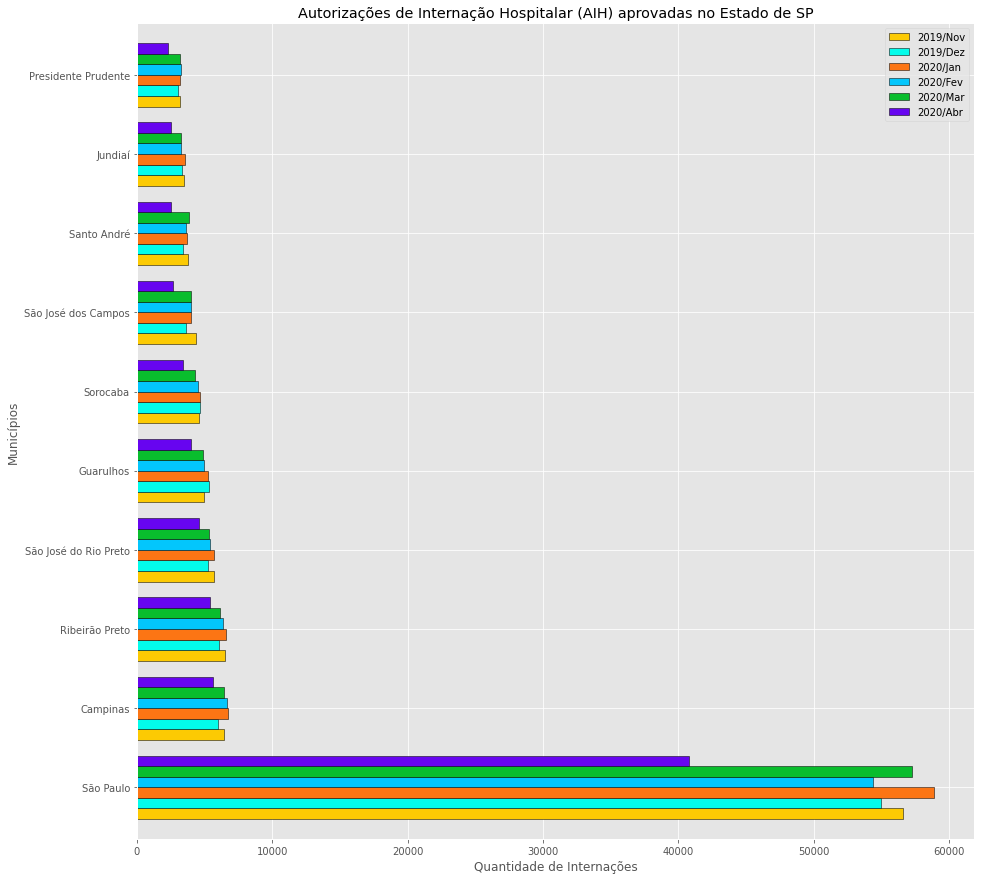

In [21]:
df_top10_AIH.plot(kind='barh', width=0.80, figsize=(15, 15), edgecolor='k',
                  color=['#fcca03','#03fceb','#fc7514','#03c6fc','#09bd2d','#6705f0'])

plt.title('Autorizações de Internação Hospitalar (AIH) aprovadas no Estado de SP')
plt.xlabel('Quantidade de Internações')
plt.ylabel('Municípios')

plt.show()